In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import cv2 as cv 
import numpy as np 
import matplotlib.pyplot as plt 

In [ ]:
import numpy as np
from PIL import Image

# Cityscapes class ID to label name mapping
CITYSCAPES_LABELS = {
    0: 'unlabeled', 1: 'ego vehicle', 2: 'rectification border', 3: 'out of roi',
    4: 'static', 5: 'dynamic', 6: 'ground', 7: 'road', 8: 'sidewalk', 9: 'parking',
    10: 'rail track', 11: 'building', 12: 'wall', 13: 'fence', 14: 'guard rail',
    15: 'bridge', 16: 'tunnel', 17: 'pole', 18: 'polegroup', 19: 'traffic light',
    20: 'traffic sign', 21: 'vegetation', 22: 'terrain', 23: 'sky', 24: 'person',
    25: 'rider', 26: 'car', 27: 'truck', 28: 'bus', 29: 'caravan', 30: 'trailer',
    31: 'train', 32: 'motorcycle', 33: 'bicycle', -1: 'ignored'
}

def get_classes_in_label(label_path):
    label = np.array(Image.open(label_path))
    unique_ids = np.unique(label)
    print(unique_ids)
    print(f"Classes found in {label_path}:")
    for class_id in unique_ids:
        class_name = CITYSCAPES_LABELS.get(class_id, f"Unknown ({class_id})")
        print(f"  ID {class_id}: {class_name}")


In [ ]:
get_classes_in_label('/kaggle/input/cv-cityscapes/gtFine_trainvaltest/gtFine/train/jena/jena_000000_000019_gtFine_labelIds.png')


In [ ]:
# Example usage
root = "/kaggle/input/cv-cityscapes/gtFine_trainvaltest/gtFine/train"
all_classes = get_unique_label_ids_from_cityscapes(root)


In [2]:
from datasets import load_dataset

ds = load_dataset("Chris1/cityscapes")

dataset_infos.json:   0%|          | 0.00/864 [00:00<?, ?B/s]

train-00000-of-00014.parquet:   0%|          | 0.00/487M [00:00<?, ?B/s]

train-00001-of-00014.parquet:   0%|          | 0.00/521M [00:00<?, ?B/s]

train-00002-of-00014.parquet:   0%|          | 0.00/503M [00:00<?, ?B/s]

train-00003-of-00014.parquet:   0%|          | 0.00/494M [00:00<?, ?B/s]

train-00004-of-00014.parquet:   0%|          | 0.00/475M [00:00<?, ?B/s]

train-00005-of-00014.parquet:   0%|          | 0.00/511M [00:00<?, ?B/s]

train-00006-of-00014.parquet:   0%|          | 0.00/529M [00:00<?, ?B/s]

train-00007-of-00014.parquet:   0%|          | 0.00/505M [00:00<?, ?B/s]

train-00008-of-00014.parquet:   0%|          | 0.00/494M [00:00<?, ?B/s]

train-00009-of-00014.parquet:   0%|          | 0.00/513M [00:00<?, ?B/s]

train-00010-of-00014.parquet:   0%|          | 0.00/512M [00:00<?, ?B/s]

train-00011-of-00014.parquet:   0%|          | 0.00/515M [00:00<?, ?B/s]

train-00012-of-00014.parquet:   0%|          | 0.00/517M [00:00<?, ?B/s]

train-00013-of-00014.parquet:   0%|          | 0.00/512M [00:00<?, ?B/s]

validation-00000-of-00003.parquet:   0%|          | 0.00/418M [00:00<?, ?B/s]

validation-00001-of-00003.parquet:   0%|          | 0.00/400M [00:00<?, ?B/s]

validation-00002-of-00003.parquet:   0%|          | 0.00/388M [00:00<?, ?B/s]

test-00000-of-00007.parquet:   0%|          | 0.00/472M [00:00<?, ?B/s]

test-00001-of-00007.parquet:   0%|          | 0.00/497M [00:00<?, ?B/s]

test-00002-of-00007.parquet:   0%|          | 0.00/503M [00:00<?, ?B/s]

test-00003-of-00007.parquet:   0%|          | 0.00/506M [00:00<?, ?B/s]

test-00004-of-00007.parquet:   0%|          | 0.00/501M [00:00<?, ?B/s]

test-00005-of-00007.parquet:   0%|          | 0.00/499M [00:00<?, ?B/s]

test-00006-of-00007.parquet:   0%|          | 0.00/495M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/2975 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/500 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1525 [00:00<?, ? examples/s]

In [6]:
ds

DatasetDict({
    train: Dataset({
        features: ['image', 'semantic_segmentation'],
        num_rows: 2975
    })
    validation: Dataset({
        features: ['image', 'semantic_segmentation'],
        num_rows: 500
    })
    test: Dataset({
        features: ['image', 'semantic_segmentation'],
        num_rows: 1525
    })
})

In [7]:
from datasets import load_dataset
import numpy as np
from tqdm import tqdm

# Initialize set to collect unique class IDs
unique_class_ids = set()

# Loop through the train set
for sample in tqdm(ds['train']):
    mask = np.array(sample['semantic_segmentation'])  # Convert to NumPy
    unique_class_ids.update(np.unique(mask))  # Add unique IDs in the mask

# Final result
unique_class_ids = sorted(list(unique_class_ids))
print(f"Total unique class IDs: {len(unique_class_ids)}")
print(f"Class IDs: {unique_class_ids}")


100%|██████████| 2975/2975 [13:33<00:00,  3.66it/s]

Total unique class IDs: 34
Class IDs: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]


In [8]:

from torchvision import transforms
from PIL import Image

image_size = (256, 256)

transform = transforms.Compose([
    transforms.Resize(image_size),
    transforms.ToTensor(),  # Converts to [0,1]
])

def preprocess(example):
    example["image"] = transform(example["image"])
    example["semantic_segmentation"] = transforms.Resize(image_size, interpolation=Image.NEAREST)(example["semantic_segmentation"])
    return example

processed_label=preprocess(ds["train"][0])


shape of image: (1024, 2048, 3)  shape of label: (1024, 2048, 3)


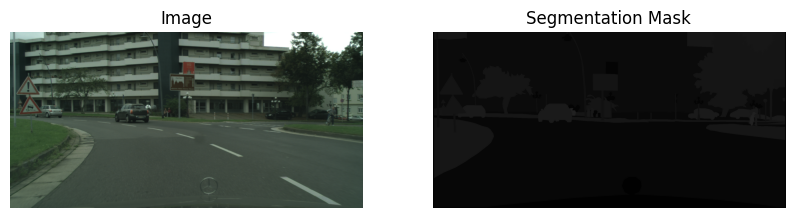

In [9]:
import matplotlib.pyplot as plt
import numpy as np

img = np.array(ds['train'][0]['image'])
mask = np.array( ds['train'][0]['semantic_segmentation'])

print("shape of image:", img.shape, " shape of label:", mask.shape)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img.transpose(0,1,2))
plt.title("Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(mask, cmap='tab20')
plt.title("Segmentation Mask")
plt.axis('off')

plt.show()


shape of image: (3, 256, 256)  shape of label: (256, 256, 3)


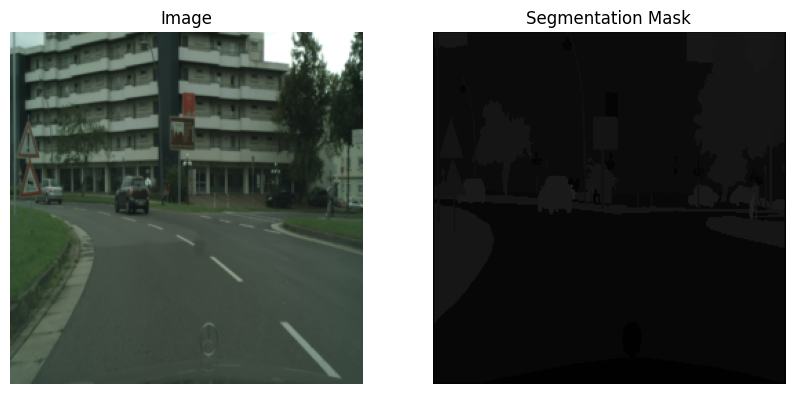

In [10]:
import matplotlib.pyplot as plt
import numpy as np

img = np.array(processed_label['image'])
mask = np.array(processed_label['semantic_segmentation'])

print("shape of image:", img.shape, " shape of label:", mask.shape)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img.transpose(1,2,0))
plt.title("Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(mask, cmap='tab20')
plt.title("Segmentation Mask")
plt.axis('off')

plt.show()


In [11]:
import numpy as np

# Original mask
mask_sample = ds["train"][0]["semantic_segmentation"]
# Processed mask
mask_changed_sample = processed_label['semantic_segmentation']

# Get unique class IDs and their frequencies
unique_vals_original, counts_original = np.unique(mask_sample, return_counts=True)
unique_vals_processed, counts_processed = np.unique(mask_changed_sample, return_counts=True)

# Print frequencies
print("Original mask class frequencies:")
for val, count in zip(unique_vals_original, counts_original):
    print(f"Class ID {val}: {count} pixels")

print("\nProcessed mask class frequencies:")
for val, count in zip(unique_vals_processed, counts_processed):
    print(f"Class ID {val}: {count} pixels")


Original mask class frequencies:
Class ID 0: 27 pixels
Class ID 1: 244602 pixels
Class ID 3: 94902 pixels
Class ID 4: 43992 pixels
Class ID 7: 2493246 pixels
Class ID 8: 87585 pixels
Class ID 11: 1835814 pixels
Class ID 17: 68538 pixels
Class ID 20: 104589 pixels
Class ID 21: 664962 pixels
Class ID 22: 390555 pixels
Class ID 23: 116166 pixels
Class ID 24: 4764 pixels
Class ID 25: 6810 pixels
Class ID 26: 127977 pixels
Class ID 33: 6927 pixels

Processed mask class frequencies:
Class ID 1: 7869 pixels
Class ID 3: 3060 pixels
Class ID 4: 1419 pixels
Class ID 7: 77859 pixels
Class ID 8: 2799 pixels
Class ID 11: 57393 pixels
Class ID 17: 1995 pixels
Class ID 20: 3219 pixels
Class ID 21: 20766 pixels
Class ID 22: 12009 pixels
Class ID 23: 3636 pixels
Class ID 24: 141 pixels
Class ID 25: 213 pixels
Class ID 26: 4023 pixels
Class ID 33: 207 pixels


In [12]:
import random
import numpy as np
import matplotlib.pyplot as plt

def show_random_sample(dataset):
    idx = random.randint(0, len(dataset) - 1)
    sample = dataset[idx]
    
    # Convert PIL Image to NumPy array
    image = np.array(sample["image"])  # shape: (H, W, 3)
    mask = np.array(sample["semantic_segmentation"])  # shape: (H, W)
    
    print("Image shape:", image.shape)
    print("Mask shape:", mask.shape)

    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title("Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(mask, cmap='tab20')  # Use a colormap for discrete labels
    plt.title("Segmentation Mask")
    plt.axis('off')
    
    plt.show()


Image shape: (1024, 2048, 3)
Mask shape: (1024, 2048, 3)


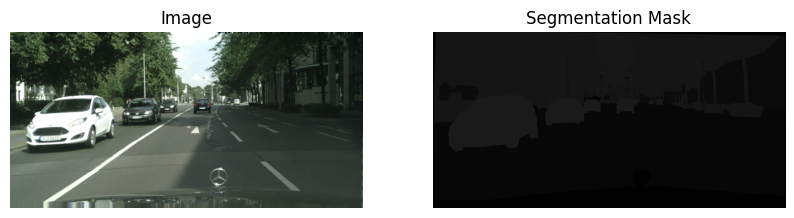

In [13]:
show_random_sample(ds["train"])

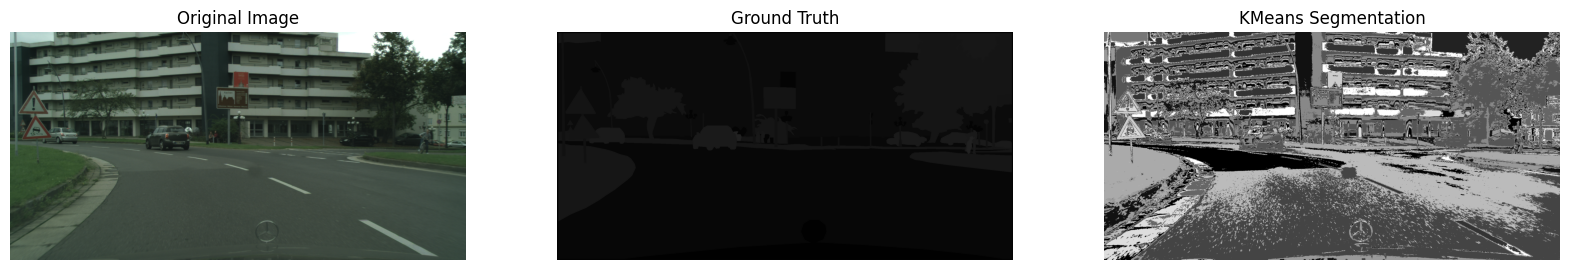

In [14]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from torchvision import transforms

def segment_by_clustering(image_tensor, n_clusters):
    h, w = image_tensor.shape[1:]  # (C, H, W)
    image_2d = image_tensor.permute(1, 2, 0).reshape(-1, 3).numpy()  # (H*W, 3)

    kmeans = KMeans(n_clusters=n_clusters, n_init='auto').fit(image_2d)
    segmented = kmeans.labels_.reshape(h, w)

    return segmented

sample = ds["train"][0]
transform = transforms.ToTensor()
image_tensor = transform(sample["image"])  # PIL -> tensor

n_clusters = len(np.unique(np.array(sample["semantic_segmentation"])))
segmented = segment_by_clustering(image_tensor, n_clusters)

plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
plt.imshow(image_tensor.permute(1, 2, 0))
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(sample["semantic_segmentation"], cmap='tab20')
plt.title("Ground Truth")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(segmented, cmap='gray')
plt.title("KMeans Segmentation")
plt.axis('off')

plt.show()
